In [3]:
import numpy as np

In [4]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']
#chcemy znaleźć zależności

In [5]:
#zamiania słoów na wektory

words=[]
for text in corpus:
    for w in text.split(' '):
        w=w.lower()
        words.append(w)
        

In [6]:
words=set(words)
len(words)
#pomijamy sprawdzanie lcizności wyrazów usuwanie sstop words i słów <2 znaków

16

In [7]:
#tworzymy słownik slow na indeksy
word2ind={}
for idw ,w in enumerate(list(words)):
    word2ind[w]=idw
    


In [8]:
#chcemy utworzyć zdania- korpus ejst lista zdan a teraz każde zdanie zamineiami na lsite słów
lista_slow_w_zdaniu=[]
for zdanie in corpus:
    lista_slow_w_zdaniu.append(zdanie.split(' '))

lista_slow_w_zdaniu

[['king', 'is', 'a', 'strong', 'man'],
 ['queen', 'is', 'a', 'wise', 'woman'],
 ['boy', 'is', 'a', 'young', 'man'],
 ['girl', 'is', 'a', 'young', 'woman'],
 ['prince', 'is', 'a', 'young', 'king'],
 ['princess', 'is', 'a', 'young', 'queen'],
 ['man', 'is', 'strong'],
 ['woman', 'is', 'pretty'],
 ['prince', 'is', 'a', 'boy', 'will', 'be', 'king'],
 ['princess', 'is', 'a', 'girl', 'will', 'be', 'queen']]

In [9]:
# #ale analize nie zawsze trzeba zaczynac od recznego tworzeia są autoamtyczne metody teraz skupimy się na sklearn.feature_extraction.text.CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# tokenizer = CountVectorizer() #tworzymy tokenizer zawsze będzie zwracała sparse matrix
# tokeny=tokenizer.fit_transform(corpus) #fitujemy na korpusie zwraca tokeny wszystkich słów zdań
# #tokeny[0] #pierwsze zdanie ale nadal jest to sparxe matrix
# #konwersja macierzy
# tokeny.toarray() #to nie do końca jest tak jak na przykład w BOW bo tu mamy zliczanie słów aby to pokazać odwołąmy się do danych z BOW


In [8]:
# #aby to pokazać odwołamy się do danych z BOW
# path = r"../BugOfWord/data/review_polarity/txt_sentoken/neg/cv000_29416.txt"
# with open(path, 'r') as f:
#     recenzja = f.read()
#     f.close()

# #przygotujme recenzje do korpusu i dzilymy na zdania
# recenzja=recenzja.split('\n')





In [9]:
# tokenizer = CountVectorizer(binary=True) 
# tokeny=tokenizer.fit_transform(recenzja) 
# #tokeny.toarray()[5] #maceirz nie zawsz jest z samych 0 i 1 i czasme ciezko jet to do zauwazeniatokenizer = CountVectorizer() 
# tokeny=tokenizer.fit_transform(recenzja) 
# #tokeny.toarray()[5] #maceirz nie zawsz jest z samych 0 i 1 i czasme ciezko jet to do zauwazenia

In [10]:
# for i in range (tokeny.shape[0]):
#     if len(np.unique(tokeny.toarray()[i]))>2:
#         print(i)
#         break
# tokeny.toarray()[6]
# #recenzja[6] #to break , one te sllowa wystęuja wiele razy w recenzji

# #5 to był pierwszy elemnt który miał wartość inną niż 1 
# #ważne jest to aby o tym pamietać jest taka funkcja binary w CountVectorizer która zamienia wszystkie wartości na 1
# #tokenizer = CountVectorizer(binary=True) to daje gwarancje że nie będzie innych wartości niż 0 i 1


In [11]:
# tokenizer.vocabulary_ #słownik słów razem ze swoimi indekasi tak jak to robiliśy wcześniej

In [12]:
# #można to łatwiej zidentyfikować
# slwonik=tokenizer.vocabulary_ #słownik słów razem ze swoimi indekasi tak jak to robiliśy wcześniej
# slowo15= np.zeros(len(slwonik))
# slowo15[15]=1
# slowo15= np.reshape(slowo15,(1,-1))
# tokenizer.inverse_transform(slowo15) #odzyskujemy słowo z indeksu
# #czyli słowo and występowało kilka razy dokąłdnie 3 i przy binary false zwracało nam 2 
# #jest wiele innych tokenizerów i da się ten proces zautomatyzować

In [13]:
# #możemy poszaleć i od razu wykonać TIFD
# from sklearn.feature_extraction.text import TfidfVectorizer

# tokenizer = TfidfVectorizer() 
# tokeny=tokenizer.fit_transform(recenzja) 
# tokeny.toarray()[6] #wartości jest jużwięcej słowo 15 miało przewagę trzykrotną a teraz nawet nie jest największe 0.2


In [10]:
lista_slow_w_zdaniu

[['king', 'is', 'a', 'strong', 'man'],
 ['queen', 'is', 'a', 'wise', 'woman'],
 ['boy', 'is', 'a', 'young', 'man'],
 ['girl', 'is', 'a', 'young', 'woman'],
 ['prince', 'is', 'a', 'young', 'king'],
 ['princess', 'is', 'a', 'young', 'queen'],
 ['man', 'is', 'strong'],
 ['woman', 'is', 'pretty'],
 ['prince', 'is', 'a', 'boy', 'will', 'be', 'king'],
 ['princess', 'is', 'a', 'girl', 'will', 'be', 'queen']]

In [15]:
# #word2vec skigram pary słowo i otocznie słowa czyli king is a to po pierwsze ustalamy otoczeni bierzemy 2 king is king a ... i tak dalej
# #dla jednego zdania
# dane=[]
# rozmiar_okna =2
# zdanie=lista_slow_w_zdaniu[0]
# zdanie

# for ids,slowo in enumerate(zdanie):
#     for i in range(max(ids - rozmiar_okna,0),min(ids + rozmiar_okna,len(zdanie)-1)+1):
#         if slowo != zdanie[i]:
#             dane.append([slowo,zdanie[i]])
# dane

In [11]:
dane=[]
rozmiar_okna =2
for zdanie in lista_slow_w_zdaniu:
    for ids,slowo in enumerate(zdanie):
        for i in range(max(ids - rozmiar_okna,0),min(ids + rozmiar_okna,len(zdanie)-1)+1):
            if slowo != zdanie[i]:
                dane.append([slowo,zdanie[i]])
dane

[['king', 'is'],
 ['king', 'a'],
 ['is', 'king'],
 ['is', 'a'],
 ['is', 'strong'],
 ['a', 'king'],
 ['a', 'is'],
 ['a', 'strong'],
 ['a', 'man'],
 ['strong', 'is'],
 ['strong', 'a'],
 ['strong', 'man'],
 ['man', 'a'],
 ['man', 'strong'],
 ['queen', 'is'],
 ['queen', 'a'],
 ['is', 'queen'],
 ['is', 'a'],
 ['is', 'wise'],
 ['a', 'queen'],
 ['a', 'is'],
 ['a', 'wise'],
 ['a', 'woman'],
 ['wise', 'is'],
 ['wise', 'a'],
 ['wise', 'woman'],
 ['woman', 'a'],
 ['woman', 'wise'],
 ['boy', 'is'],
 ['boy', 'a'],
 ['is', 'boy'],
 ['is', 'a'],
 ['is', 'young'],
 ['a', 'boy'],
 ['a', 'is'],
 ['a', 'young'],
 ['a', 'man'],
 ['young', 'is'],
 ['young', 'a'],
 ['young', 'man'],
 ['man', 'a'],
 ['man', 'young'],
 ['girl', 'is'],
 ['girl', 'a'],
 ['is', 'girl'],
 ['is', 'a'],
 ['is', 'young'],
 ['a', 'girl'],
 ['a', 'is'],
 ['a', 'young'],
 ['a', 'woman'],
 ['young', 'is'],
 ['young', 'a'],
 ['young', 'woman'],
 ['woman', 'a'],
 ['woman', 'young'],
 ['prince', 'is'],
 ['prince', 'a'],
 ['is', 'prince'],


In [12]:
len(dane) #zbior uczący ma 140 elementów

140

In [18]:
#utowrzenei X i Y

X= np.zeros((len(dane),len(words))) #rozmiar tyle elemntów ile ejst par ale kzady elemtno to wekrto 0 1 i ich będie tyle ile słów
Y= np.zeros((len(dane),len(words))) #to samo co wyżej ale dla słów otoczenia

for idx,(x,y) in enumerate(dane):
    X[idx][word2ind[x]]=1
    Y[idx][word2ind[y]]=1
    
Y[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
#budowa modelu
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input


In [20]:
x = Input(shape=(X.shape[1],))  # czyli długość słownika słów
h = Dense(2, activation='linear')(x)  # warstwa ukryta 2 neurony ale zazwyczaj to 100/200/300
out = Dense(X.shape[1], activation='sigmoid')(h)  # wyjście tyle ile słów

model = Model(x, out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# history=model.fit(X, Y, epochs=10000)  # trenowanie modelu
history=model.fit(X, Y, epochs=100)  # trenowanie modelu

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0395 - loss: 2.7594
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0603 - loss: 2.7462 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0674 - loss: 2.7471 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0431 - loss: 2.7491 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0388 - loss: 2.7382 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0492 - loss: 2.7349 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0579 - loss: 2.7285 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1097 - loss: 2.7311 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0999 - loss: 2.7263 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1201 - loss: 2.7283 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1201 - loss: 2.7230 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1216 - loss

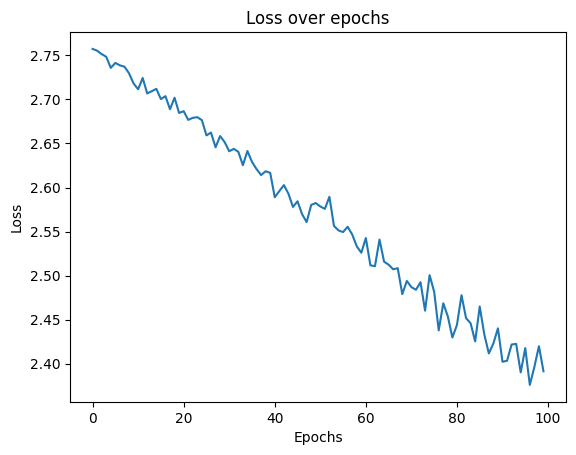

In [22]:
import matplotlib.pyplot as plt

# Sprawdzenie, czy 'loss' jest dostępny w historii
if 'loss' in history.history:
    plt.plot(history.history['loss'])
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
else:
    print("No loss data available.")


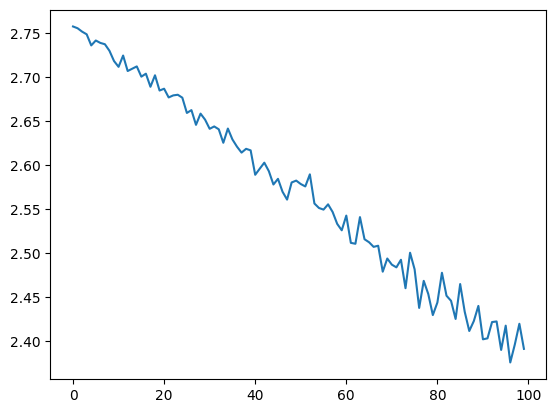

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [24]:
#chcialbym uzyskac reproezentajce kazdego slwoa z osobna
slowa=np.zeros((len(words),len(words)))
for idw ,w in enumerate(words):
    slowa[idw][word2ind[w]] =1
    
slowa #koder słów


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [25]:
encoder= Model(x, h)

In [26]:
slowa_h=encoder.predict(slowa) #to jest reprezentacja słów

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [27]:
slowa_h

array([[-0.03528923,  0.16768569],
       [-1.3301723 ,  0.23474371],
       [-0.56753397,  0.3654328 ],
       [-0.8494619 , -0.05064359],
       [-0.25131226, -0.22807129],
       [-0.37689614,  0.14978626],
       [-0.46435457, -0.43703365],
       [-1.291013  ,  0.24863613],
       [-0.54295003, -0.57579434],
       [-0.75564265, -0.03416899],
       [-0.72434795, -0.5842161 ],
       [-1.3341343 , -0.13290784],
       [-0.9952288 , -0.1714739 ],
       [-0.6452235 ,  0.06888616],
       [-0.9478215 , -0.78533465],
       [-0.4507119 , -0.6943457 ]], dtype=float32)

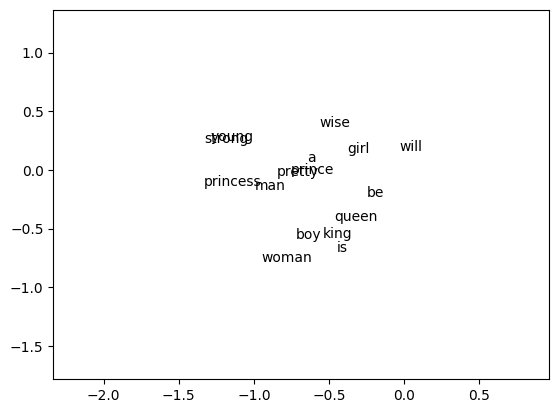

In [32]:
import matplotlib.pyplot as plt

# Corrected method name: subplots()
fig, ax = plt.subplots()

# Assuming `words` and `slowa_h` are already defined, with `slowa_h` being a 2D array or similar structure
for w, x, y in zip(list(words), slowa_h[:, 0], slowa_h[:, 1]):
    ax.annotate(w, (x, y))

# Set the limits based on the data
ax.set_xlim(slowa_h[:, 0].min() - 1, slowa_h[:, 0].max() + 1)
ax.set_ylim(slowa_h[:, 1].min() - 1, slowa_h[:, 1].max() + 1)

plt.show()


NUMPY

In [1]:
# jenym z najbarddziel kluczowych elementów w AI jest algorytm wstecznej propagacji błędów.
# algorytm ten opeira się o metodę spatku gradientu, która polega na minimalizacji funkcji kosztu.
# tą metodę musimy potrafić stosować do innych modeli jest to tak naprawde metoda składania gradneitu, ułątwia liczenie 


In [41]:
class word2vec:
    def __init__(self,d_in,h_factor,lr=0.01): #d_in to długość wektora wejściowego a h_factor to długość wektora ukrytego
        self.W=np.random.random((d_in,h_factor)) #wagi wejściowe
        self.V=np.random.random((h_factor,d_in)) #wagi wyjściowe
        self.l_r=lr #learning rate
        
    def softmax(self,x):
        out=np.exp(X)
        return out/ sum(out)
        
    def predict(self,X):
        step1 = np.matmul(X,self.W) #przesyłamy dane przez warstwę ukrytą
        step2 = np.matmul(step1,self.V) #przesyłamy dane przez warstwę wyjściową
        #na wyjsciu chcemy uzyskać prawdopodobieństwo daltego przesyłane jest do softmax
        step3 = self.softmax(step2) #przesyłamy dane przez softmax
        return [step1, step2, step3]
    
    #takie sieci są uczone często za pomoca entropii krzyzowej l(y,yhat)=-sum(y*log(yhat))
    
    def cross_entropy(self,y,yh):
        return -sum(y*np.log(yh))
    
    #uczenie sieci za pomoca metody wstecznej propagacji błędó czyli trzeba obliczyć gradienty np. vji= vji- pochodna funkcji straty po vji
    #więc tą pochodną funkcji straty musimy policzyć funkcja ma y z daszkiem więc dl/dlvji= dl/dyi*dyi/dvji ale uwaga
    #każde to yi zależy od neuronu więc nie wystarczy zrobić to dla jednego neuronu ale dla wszystkich więc trzeba zastosować sume
    #dl/dvji= sum(dl/dyi*dyi/dvji) i finalnie mamy suma dl/dyhatm*dxyhatm/dSm*dsm/dvji trzeba obliczyć te trzy skłądniki
    # sm= suma hj vjm-> dsm/dvji= 0 jeśli i !=i jeżeli m=i to dsm/dvji= hj
    #dl/dyhatm=dlymln(yhatm)/dyhatm= ym 1/yhatm
    #dyhatm/dsi= jeżeli m!=i to (-edosm * esi)/(suma edo sj )^2 = -yhatm * yhai = jeżeli m=i to yhatm(1-yhatm)
    #czyli teraz możemy podstawić sobie te wartości i obliczyć pochodną funkcji straty po vji
    #suma od m=1 do k =ym 1/ymhat * (-ym yi)*dsm/dvji - yi 1/yhat i  yhati (1-yhati)* dsm/dvji
    #skracamy i wychodzi = suma od m=1 do k ym * yihat * dsm/dvji - yi * + yi dsm/dvji
    #= (suma od m=1 do k = ym yihat - yi)*dsm/dvji
    #= (yihat suma od m=1 do k = ym - yi)*dsm/dvji
    # jest to suma wszystkich wyjść softmax zatem liczniki staną się mianownikam czyli sumuje się do 1
    #=(yihat-yi)*dsm/dvji
    #=(yhati-yi)*hj czyli różnia między predykcją a prawdziwą wartością pomnożona przez wartość warstwy ukrytej
    #dl/dwij= sprawa ma się analogicznie 
    
    
    def backward(self,X,Y):
        res= self.predict(X)
        b1 = res[2]-Y
        h1b1= np.matmul(res[0].reshape(self.V.shape[0],1),b1.reshape(1,len(b1)))
        b0= np.matmul(b1,self.V.T)
        Xb0= np.matmul(X.reshape(len(X),1),b0.reshape(1,self.V.shape[0]))
        self.W-= self.l_r * Xb0
        self.V-=self.l_r* h1b1
        return self.cross_entropy(Y,res[2])

    
    def fit (self,X,Y,epochs):
        history=[]
        for nr in range(epochs):
           print(nr/epochs)
           suma=0   
           for idx , (x,y) in enumerate(zip(X,Y)):
               suma+=self.backward(x,y)
               
           history.append(suma/idx)
        return history
        
    
epoch=200
lr=0.01
d_in=len(words)
X=np.zeros((len(dane),len(words)),dtype=np.float16)
Y=np.zeros((len(dane),len(words)),dtype=np.float16)
for ids,s in enumerate(dane):
    X[ids][word2ind[s[0]]]=1
    Y[ids][word2ind[s[1]]]=1

model = word2vec(d_in, 2, lr)   
model.fit(X, Y, epoch)  # trenowanie modelu

0.0


ValueError: cannot reshape array of size 2240 into shape (1,140)